### Importing libraries and data

NEW LINE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
final_test_data = pd.read_csv("/content/drive/MyDrive/Data/test.csv")
train_data = pd.read_csv("/content/drive/MyDrive/Data/train.csv")

### Visualizing data and basic statics

In [4]:
train_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
train_data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Maybe use this **Product ID** to check if the number of a specific Product influence the **failure rate**.

In [6]:
train_data['Product ID'].value_counts()

L53257    139
L49056    131
L53271    131
L54275    120
L48892    120
         ... 
M24614      1
H39399      1
M15853      1
H32637      1
L48036      1
Name: Product ID, Length: 9976, dtype: int64

Text(0.5, 0, 'Type')

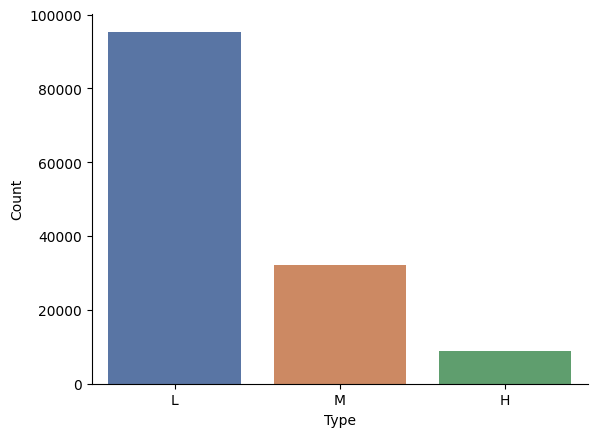

In [7]:
class_counts = train_data['Type'].value_counts()
sns.barplot(x= class_counts.index, y= class_counts.values, hue= class_counts.index, palette='deep')
sns.despine()
plt.ylabel('Count')
plt.xlabel('Type')

Text(0.5, 0, 'Failure')

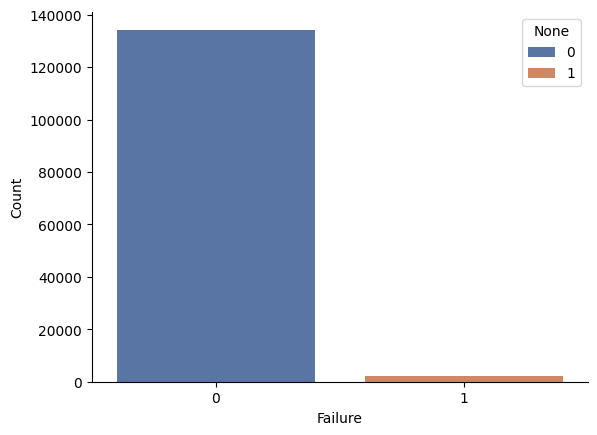

In [8]:
class_counts = train_data['Machine failure'].value_counts()
sns.barplot(x= class_counts.index, y= class_counts.values, hue= class_counts.index, palette='deep')
sns.despine()
plt.ylabel('Count')
plt.xlabel('Failure')

Very imbalanced data!!

In [9]:
train_data.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [10]:
products = pd.DataFrame(train_data['Product ID'].value_counts().reset_index())
products.rename(columns= {'Product ID': 'Product ID Count',
                          'index': 'Product ID'}, inplace=True)

In [11]:
products.head()

,Product ID,Product ID Count
0,L53257,139
1,L49056,131
2,L53271,131
3,L54275,120
4,L48892,120


In [12]:
train_data = train_data.merge(right= products, how= 'inner', on= 'Product ID')

<Axes: >

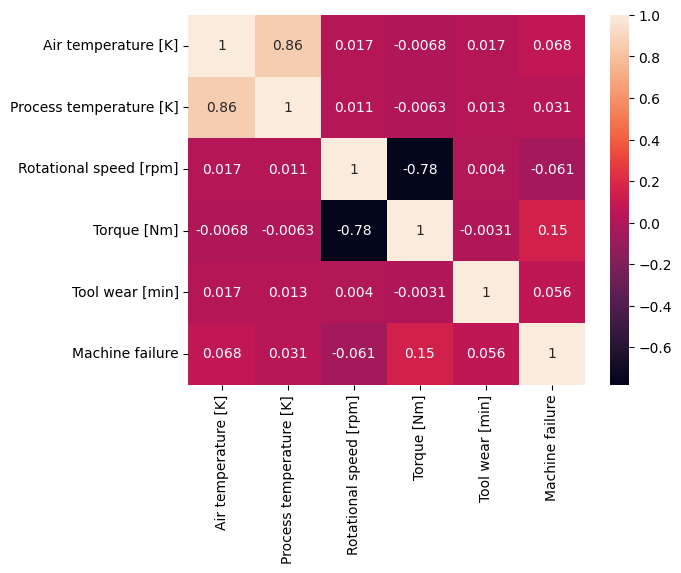

In [13]:
sns.heatmap(train_data[['Air temperature [K]','Process temperature [K]',
                        'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']].corr(),
            annot=True)

Apparently none of the other features interferes (alone) that much to Machine Failure.

### Cleaning data

In [14]:
train_data.drop(columns=['id', 'Product ID'], axis=1, inplace=True)

In [15]:
train_data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Product ID Count
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,25
1,L,300.6,309.5,1411,41.6,140,0,0,0,0,0,0,25
2,L,300.6,309.6,1528,41.6,221,0,0,0,0,0,0,25
3,L,300.6,309.5,1411,41.6,140,0,0,0,0,0,0,25
4,L,300.5,309.2,1771,28.1,125,0,0,0,0,0,0,25


### Splitting the data

In [47]:
X = train_data.drop('Machine failure', axis=1)
y = train_data['Machine failure']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Using One Hot Encoder


In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder(handle_unknown='ignore')

transformer = ColumnTransformer(transformers=[('one_hot_encoder',
                                encoder,
                                ['Type'])])

dados_transformados = transformer.fit_transform(train_data)


In [39]:
dados_transformados

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

# Setting up the pipeline to use Naive Bayes

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier



pipeline = Pipeline(steps=[
    ('one_hot_encoder', ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['Type'])])),
    ('naive_bayes', ComplementNB())
])



pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.30      0.46     44313
           1       0.02      0.74      0.03       709

    accuracy                           0.31     45022
   macro avg       0.50      0.52      0.25     45022
weighted avg       0.97      0.31      0.45     45022



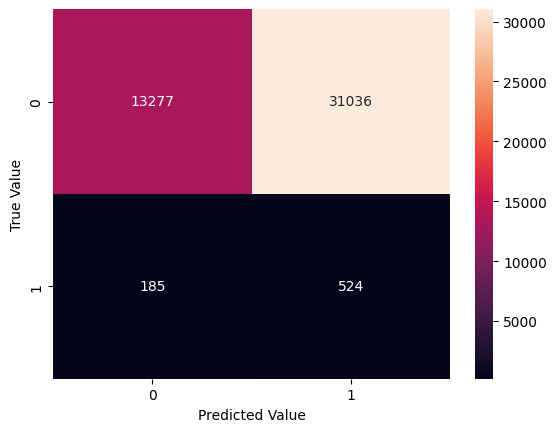

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_pred=y_pred, y_true=y_test), annot=True, fmt='.10g')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
print(classification_report(y_pred=y_pred, y_true=y_test))

In [62]:
y_test.value_counts()

0    44313
1      709
Name: Machine failure, dtype: int64